In [41]:
from binance.client import Client
import matplotlib.pyplot as plt
import mplfinance as mpf

import pandas as pd


In [64]:
api_key = 'iyJXPaZztWrimkH6V57RGvStFgYQWRaaMdaYBQHHIEv0mMY1huCmrzTbXkaBjLFh'

api_secret = 'hmrus7zI9PW2EXqsDVovoS2cEFRVsxeETGgBf4XJInOLFcmIXKNL23alGRNRbXKI'
client = Client(api_key, api_secret)


In [78]:
interval='1m'
symbol = 'ETHUSDT'
n = 40

In [79]:
klines = client.futures_klines(symbol=symbol, interval=interval, limit=n)
len(klines)

40

In [80]:
timestamps = [int(kline[0]) for kline in klines]
open_prices = [float(kline[1]) for kline in klines]
high_prices = [float(kline[2]) for kline in klines]
low_prices = [float(kline[3]) for kline in klines]
close_prices = [float(kline[4]) for kline in klines]
date=pd.to_datetime(timestamps, unit='ms')

# Create a DataFrame with DatetimeIndex
df = pd.DataFrame({
    'date': date,
    'open': open_prices,
    'high': high_prices,
    'low': low_prices,
    'close': close_prices,
}, index=pd.to_datetime(timestamps, unit='ms'))
print(df.head)

<bound method NDFrame.head of                                    date     open     high      low    close
2023-12-11 07:41:00 2023-12-11 07:41:00  2238.41  2239.12  2237.48  2237.48
2023-12-11 07:42:00 2023-12-11 07:42:00  2237.48  2237.85  2236.88  2237.85
2023-12-11 07:43:00 2023-12-11 07:43:00  2237.85  2237.86  2236.80  2236.80
2023-12-11 07:44:00 2023-12-11 07:44:00  2236.80  2237.00  2236.05  2236.42
2023-12-11 07:45:00 2023-12-11 07:45:00  2236.43  2238.29  2236.26  2238.21
2023-12-11 07:46:00 2023-12-11 07:46:00  2238.21  2243.46  2238.21  2242.67
2023-12-11 07:47:00 2023-12-11 07:47:00  2242.64  2242.65  2239.19  2239.19
2023-12-11 07:48:00 2023-12-11 07:48:00  2239.16  2239.85  2237.95  2238.70
2023-12-11 07:49:00 2023-12-11 07:49:00  2238.71  2239.69  2238.33  2238.43
2023-12-11 07:50:00 2023-12-11 07:50:00  2238.44  2238.68  2237.57  2238.29
2023-12-11 07:51:00 2023-12-11 07:51:00  2238.28  2238.80  2236.00  2236.47
2023-12-11 07:52:00 2023-12-11 07:52:00  2236.47  2237.86 

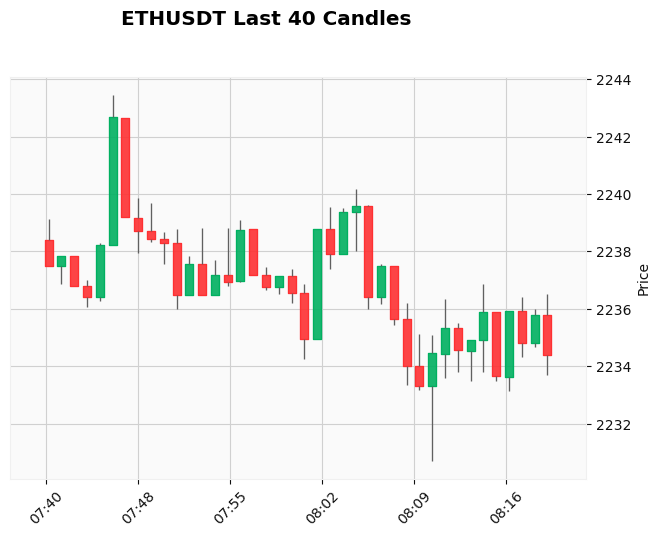

In [81]:
mpf.plot(df, type='candle', style='yahoo', title=f'{symbol} Last {n} Candles', ylabel='Price', show_nontrading=True)


In [63]:
if close_prices[-1] > close_prices[-2]:
        direction = "Up"
elif close_prices[-1] < close_prices[-2]:
    direction = "Down"
else:
    direction = 'No Change'



In [71]:
def place_buy_order(price, quantity, symbol):
    client = Client(api_key=api_key, api_secret=api_secret)
    order = client.futures_create_order(
        symbol=symbol,
        side='BUY',
        type='LIMIT',
        timeInForce='GTC',  # Good 'til canceled
        quantity=quantity,
        price=price
    )

    print("Buy order placed successfully:")
    return order['price'] 

In [72]:
place_buy_order(price=2230, quantity=0.01, symbol='ETHUSDT')

Buy order placed successfully:
2230.00
